<a href="https://colab.research.google.com/github/gautamHCSCV/AI-ML/blob/main/Relative_errors_obj_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [2]:
import os
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from catboost import CatBoostRegressor
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Virtual env/Data_shashi_gautam/new_data_velocity/'
print(os.listdir(path))

['obj_2_new', 'obj_3_new', 'obj_4_new', 'obj_6_new', 'obj_7_new', 'obj_8_new']


In [ ]:
for i in [2,3,4,6,7,8]:
    f1_test = pd.read_csv(path+f'obj_{i}_new/a{i}_f_mixed_test_n.csv')
    y = np.array(f1_test)
    avg_mix.append(y.mean())

In [ ]:
avg_deform = [0.8]+avg_deform[:3]+[1.18]+avg_deform[3:]+[1.23]
print(avg_deform)

[0.8, 0.9175513714511446, 1.0208982927708983, 1.1064406712124075, 1.18, 1.2064600587396734, 1.2623454493928514, 1.2542861635436164, 1.23]


In [ ]:
print(avg_indent)

[0.85, 0.9625711218783023, 1.0525822246849306, 1.135527354965078, 1.2, 1.225483598360867, 1.2799874797041315, 1.2587636916574316, 1.253]


In [ ]:
print(avg_phase)

[0.845, 0.9590612423392798, 1.0434987556757562, 1.1300888643525298, 1.2, 1.226630192541498, 1.267226872689378, 1.2622741892663079, 1.24]


In [ ]:
avg_mix = [0.84]+avg_mix[:3]+[1.2]+avg_mix[3:]+[1.24]
print(avg_mix)

[0.84, 0.9515890883528074, 1.0430195642331186, 1.1247500361418028, 1.2, 1.2240432112984838, 1.269916311470852, 1.2623437172837253, 1.24]


In [ ]:
print(avg_deform,avg_indent,avg_phase,avg_mix)

[0.8070866959792523, 1.1839506552393386, 1.2386379540731327] [0.8540874771268782, 1.2090973918197985, 1.2538047215277954] [0.8449345073567726, 1.2064174701635113, 1.2392787174652011] [0.8392289587189119, 1.1996832587991386, 1.2429714868976036]


In [ ]:
obj1 = [0.807,0.854,0.8449,0.839]
obj5 = [1.18,1.209,1.20,1.199]
obj9 = [1.23,1.25,1.239,1.24]

In [4]:
def data(x,y,step=10):
    x_train,y_train = [],[]
    for i in range(0,len(y),step):
        x_train.append(x[i])
        y_train.append(y[i])
    return np.array(x_train),np.array(y_train)


In [ ]:
obj1_abs_rel = 0.02581
obj5_abs_rel = 0.0250
obj9_abs_rel = 0.0271

In [ ]:
obj1_abs_rel =[0.03839439,0.03109597,0.0293836,0.02581434,0.02655258,0.02629092,0.02463409,0.02297273]

In [7]:
y_p = np.zeros((58223,5))
y_p[:,0] = y_test[:,0]
y_p[0]

array([0.0031, 0.    , 0.    , 0.    , 0.    ])

In [8]:
path = '/content/drive/MyDrive/Virtual env/Data_shashi_gautam/obj_1_new/deform/'
i = 1
for p in [1,5,10,50]:
        x1_train = pd.read_csv(path+f'a1_x1_d_train_n.csv')
        x2_train = pd.read_csv(path+f'a1_x2_d_train_n.csv')
        f1_train = pd.read_csv(path+f'a1_f_d_train_n.csv')
        f1_test = pd.read_csv(path+f'a1_f_d_test_n.csv')
        x1_test = pd.read_csv(path+f'a1_x1_d_test_n.csv')
        x2_test = pd.read_csv(path+f'a1_x2_d_test_n.csv')
        print(len(x1_train),len(x1_test),len(f1_train),len(f1_test))
        X_train = np.concatenate((x1_train,x2_train),axis=1)
        X_test = np.concatenate((x1_test,x2_test),axis=1)
    
        x_train,x_test,y_train,y_test = np.array(X_train),np.array(X_test),np.array(f1_train),np.array(f1_test)
        
        x_train,y_train = data(x_train,y_train,step=100//p)
        cat = CatBoostRegressor(iterations = 1200, learning_rate=0.01,bagging_temperature=10)
        cat.fit(x_train,y_train)
        print(len(y_test))
        y2_pred = cat.predict(x_test)
        statement2 = 'Root Mean Squared error: {}\n'.format(mean_squared_error(y_test,y2_pred)**0.5)
        y_p[:,i] = y2_pred
        i+=1

116447 58223 116447 58223
0:	learn: 1.0787187	total: 5.73ms	remaining: 6.88s
1:	learn: 1.0705126	total: 18.7ms	remaining: 11.2s
2:	learn: 1.0622654	total: 22ms	remaining: 8.78s
3:	learn: 1.0541561	total: 27.7ms	remaining: 8.27s
4:	learn: 1.0468441	total: 33.6ms	remaining: 8.02s
5:	learn: 1.0390316	total: 39.1ms	remaining: 7.79s
6:	learn: 1.0314611	total: 46.7ms	remaining: 7.96s
7:	learn: 1.0235001	total: 49.8ms	remaining: 7.43s
8:	learn: 1.0157739	total: 51.4ms	remaining: 6.8s
9:	learn: 1.0075146	total: 53ms	remaining: 6.3s
10:	learn: 1.0000329	total: 55.8ms	remaining: 6.03s
11:	learn: 0.9919323	total: 58.2ms	remaining: 5.76s
12:	learn: 0.9845832	total: 60.1ms	remaining: 5.49s
13:	learn: 0.9769995	total: 62.1ms	remaining: 5.26s
14:	learn: 0.9696301	total: 63.9ms	remaining: 5.05s
15:	learn: 0.9628719	total: 65.6ms	remaining: 4.86s
16:	learn: 0.9556694	total: 67.4ms	remaining: 4.69s
17:	learn: 0.9477624	total: 70.1ms	remaining: 4.6s
18:	learn: 0.9400017	total: 71.6ms	remaining: 4.45s
19:

In [ ]:
print(maxi_error_indent)
print(maxi_error_phase)
print(maxi_error_mixed)

[1.3056554209678515, 1.111523010337649, 0.8581728974446463, 0.7704788274299039, 0.7664738678800527, 0.7229242523890589, 0.6791283147169827, 0.6713973496552974]
[1.4789453820781793, 1.0181438932495448, 0.6853450487925601, 0.6776583879302001, 0.6719356054334273, 0.6789869717204002, 0.6562268244512532, 0.6484659829702304]
[2.415393784266846, 1.4574705515881936, 0.966971359311307, 0.8431297726311566, 0.7957255412076325, 0.7884964003512493, 0.8027443304381814, 0.807148888980354]


In [9]:
y_p[:2]

array([[0.0031    , 0.01767162, 0.0157836 , 0.01354223, 0.00665813],
       [0.0026    , 0.01425432, 0.01449501, 0.01230356, 0.00596158]])

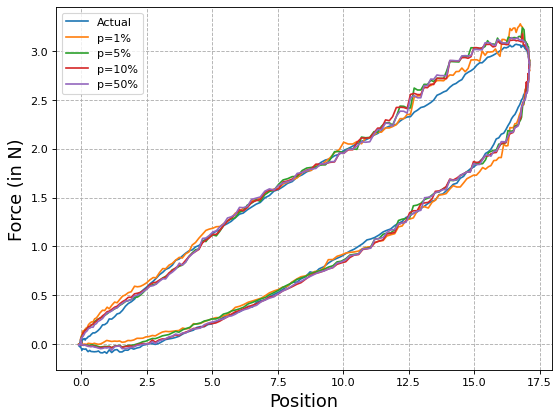

In [19]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.grid(linestyle='--',linewidth=0.8)
plt.plot(x_test[340:700,0],y_p[340:700,0],label = 'Actual')
plt.plot(x_test[340:700,0],y_p[340:700,1],label = 'p=1%')
plt.plot(x_test[340:700,0],y_p[340:700,2],label = 'p=5%')
plt.plot(x_test[340:700,0],y_p[340:700,3],label = 'p=10%')
plt.plot(x_test[340:700,0],y_p[340:700,4],label = 'p=50%')
plt.legend()
plt.ylabel('Force (in N)',fontsize=16)
plt.xlabel('Position',fontsize=16)
plt.savefig('hysteresis.pdf')
plt.show()

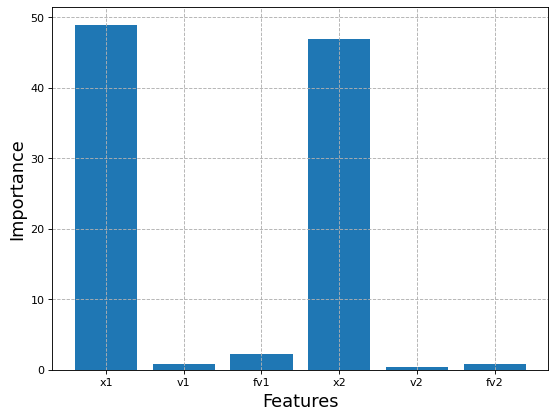

In [ ]:
imp = cat.feature_importances_
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.grid(linestyle='--',linewidth=0.8)
features = ['x1','v1','fv1','x2','v2','fv2']
plt.bar(features,imp)
plt.xlabel('Features',fontsize=16)
plt.ylabel('Importance',fontsize=16)
plt.savefig('feature_importance_cat.pdf')
plt.show()

In [ ]:
with open('/content/drive/MyDrive/Virtual env/Data_shashi_gautam/prediction_rf.csv','w') as f:
    writer = csv.writer(f)
    writer.writerow(['Actual', 'rf-10%'])
    for i in range(58219):
        writer.writerow(preds[i])

In [ ]:
preds[-3:]

array([[-0.0684    ,  0.017767  ],
       [-0.0607    ,  0.010799  ],
       [-0.0694    ,  0.00897025]])

In [ ]:
def data(x,y,step=10):
    x_train,y_train = [],[]
    for i in range(4,len(y),step):
        x_i = [0]*10
        for j in range(5):
            x_i[j]=x[i-j,0]
            x_i[j+5]=x[i-j,1]
        x_train.append(x_i)
        y_train.append(y[i])
    return np.array(x_train),np.array(y_train)

In [ ]:

path1 = path+'catboost/'
if 1==1:
        x1_train = pd.read_csv(path1+f'a5_x1_d_train_n.csv')
        x2_train = pd.read_csv(path1+f'a5_x2_d_train_n.csv')
        f1_train = pd.read_csv(path1+f'a5_f_d_train_n.csv')
        f1_test = pd.read_csv(path1+f'a5_f_d_test_n.csv')
        x1_test = pd.read_csv(path1+f'a5_x1_d_test_n.csv')
        x2_test = pd.read_csv(path1+f'a5_x2_d_test_n.csv')
        print(len(x1_train),len(x1_test),len(f1_train),len(f1_test))
        X_train = np.concatenate((x1_train,x2_train),axis=1)
        X_test = np.concatenate((x1_test,x2_test),axis=1)
    
        x_train,x_test,y_train,y_test = np.array(X_train),np.array(X_test),np.array(f1_train),np.array(f1_test)

        x_train,y_train = data(x_train,y_train)
        x_test,y_test = data(X_test,y_test,1)
        print(len(x_test),len(y_test))
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y1_pred = rf.predict(x_test)
print('Root Mean Squared error of Random Forest',sqrt(mean_squared_error(y_test,y1_pred)))
preds[:,1] = y1_pred[:]

116447 58223 116447 58223
58219 58219
Root Mean Squared error of Random Forest 0.8212986348525738


In [ ]:
preds = np.zeros((58219,2))
preds[:,0] = y_test[:,0]